In [1]:
%matplotlib inline
import re
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import numpy
import torch
from sklearn.linear_model import LogisticRegression

In [2]:
train = pd.read_csv("train.csv", header=None, nrows=100)
train.head()

,0,1,2,3,4,5,6,7,8,9,...,88191,88192,88193,88194,88195,88196,88197,88198,88199,88200
0,-0.046627,-0.053661,-0.016606,-0.008460,-0.014638,-0.035218,-0.047178,-0.056229,-0.058350,-0.062226,...,-0.056585,-0.058592,-0.056084,-0.042918,-0.051984,-0.037560,-0.036154,-0.036979,-0.027567,5.0
1,0.000000,0.000712,0.001424,0.002135,0.002843,0.003550,0.004253,0.004954,0.005650,0.006341,...,-0.006341,-0.005650,-0.004954,-0.004253,-0.003550,-0.002843,-0.002135,-0.001424,-0.000712,0.0
2,0.015198,0.028053,0.027532,0.028745,0.024490,0.021514,0.017232,0.015572,0.014204,0.014561,...,-0.014135,-0.018649,-0.021481,-0.022629,-0.019144,-0.017117,-0.013521,-0.008887,-0.003531,8.0
3,-0.052935,-0.061702,-0.060131,-0.040481,0.029915,0.112537,0.198678,0.217514,0.180841,0.082558,...,0.013204,-0.003309,-0.013274,0.005676,0.031212,0.054739,0.070668,0.078661,0.097999,8.0
4,0.000218,0.006255,0.011420,0.015926,0.018090,0.018111,0.017685,0.017037,0.018973,0.020819,...,-0.007386,-0.009816,-0.012220,-0.013219,-0.001098,0.000035,0.000455,0.001339,0.003039,5.0


In [3]:
train = train.values

In [4]:
X_train = train[:,1:-1]
N_train = X_train.shape[0]

y_train = train[:,-1]
y_train = y_train.reshape(N_train,1)

In [25]:
test = pd.read_csv("test.csv", header=None, nrows=100)
test = test.values

X_test = test[:,1:-1]
N_test = X_test.shape[0]

y_test = test[:,-1]
y_test = y_test.reshape(N_test,1)

In [5]:
SAMPLE_RATE = 22050

In [6]:
T = 4.0    # seconds
t = np.linspace(0, T, int(T*SAMPLE_RATE), endpoint=False) # time variable
freq = 440
signal = np.sin(2*np.pi*freq*t)
ipd.Audio(signal, rate=SAMPLE_RATE)

# Creating spectrograms
Spectrograms provide a 2D feature space to analyze signals in the joint time-frequency domain.

This code generates the spectrogram files for use with the CNN example. It makes files for non-noised data!

In [7]:
# JUST SOME FOURIER TRANSFORM PARAMETERS
BINS_OCTAVE = 12*2
N_OCTAVES = 7
NUM_BINS = BINS_OCTAVE * N_OCTAVES

In [8]:
# Given a wav time series, makes a mel spectrogram
# which is a short-time fourier transform with
# frequencies on the mel (log) scale.
def mel_spec(y):
    Q = librosa.cqt(y=y, sr=SAMPLE_RATE, bins_per_octave=BINS_OCTAVE,n_bins=NUM_BINS)
    Q_db = librosa.amplitude_to_db(Q,ref=np.max)
    return Q_db

In [9]:
# This means that the spectrograms are 168 rows (frequencies)
# By 173 columns (time frames)
song = X_train[0]
test_spec = mel_spec(song)
print(test_spec.shape)
FEATS = test_spec.shape[0]
FRAMES = test_spec.shape[1]

(168, 173)


/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


In [10]:
tmp_train = np.zeros((N_train,FEATS,FRAMES))
for i in range(N_train):
    tmp_train[i,:,:] = mel_spec(X_train[i])
#np.save('Data/xtrain_spec', tmp_train)

/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


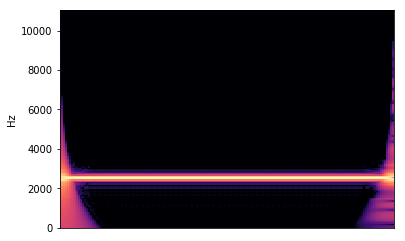

In [157]:
librosa.display.specshow(tmp_train[50], y_axis='hz')

In [158]:
ipd.Audio(X_train[50], rate=SAMPLE_RATE)

In [159]:
y_train[50]

array([0.])

In [26]:
tmp_test = np.zeros((N_test,FEATS,FRAMES))
for i in range(N_test):
    tmp_test[i,:,:] = mel_spec(X_test[i])

/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


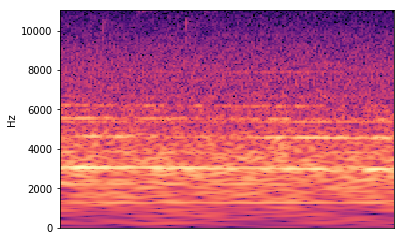

In [186]:
librosa.display.specshow(tmp_test[14], y_axis='hz')

In [187]:
ipd.Audio(X_test[14], rate=SAMPLE_RATE)